## **1. Import Required Libraries**

<hr style="border: 1px solid red;">

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set visualization styles
sns.set_theme(style="whitegrid")

sns.set_theme(style="whitegrid", font_scale=1.15)
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['figure.autolayout'] = True

<hr style="border: 1px solid red;">

## **2. Mount Google Drive and Load Data**

<hr style="border: 1px solid red;">

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


***

In [3]:
import os
supply_chain_path = '/content/drive/My Drive/supply_chain'
print(os.listdir(supply_chain_path))

['DescriptionDataCoSupplyChain.csv', 'tokenized_access_logs.csv', 'DataCoSupplyChainDataset.csv', 'supply_chain_data_cleaned.csv']


***

In [4]:
df = pd.read_csv('/content/drive/My Drive/supply_chain/supply_chain_data_cleaned.csv', encoding='latin-1')

<hr style="border: 1px solid red;">

## **3. Define On-Time Delivery Flag**
<hr style="border: 1px solid red;">

In [5]:
# Create a binary flag indicating on-time delivery
# Assume 'Delivery Status' contains keywords like "on time" or "late"
df['OnTime'] = df['Delivery Status'].str.contains('on time', case=False, na=False)

<hr style="border: 1px solid red;">

## **4. Overall Delivery Performance**
<hr style="border: 1px solid red;">

Overall On-Time Delivery Rate: 17.83%


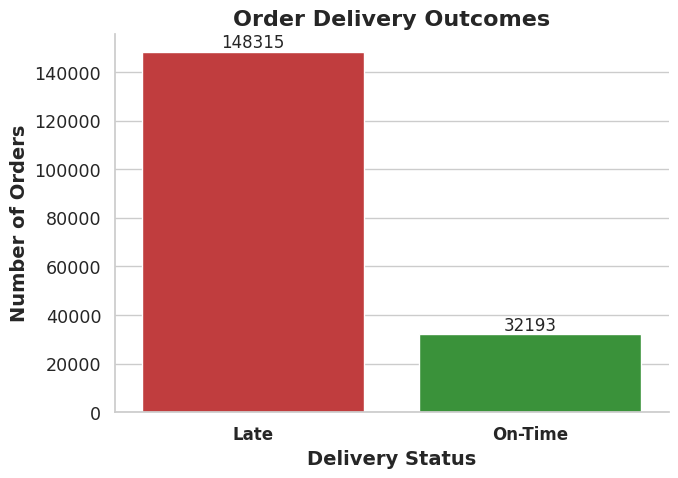

In [13]:
# Calculate overall on-time delivery rate
overall_ontime_rate = df['OnTime'].mean() * 100
print(f"Overall On-Time Delivery Rate: {overall_ontime_rate:.2f}%")

# Plot on-time vs late delivery counts
plt.figure(figsize=(7,5))
ax = sns.countplot(data=df, x='OnTime', palette=['#d62728', '#2ca02c'])
ax.set_xticklabels(['Late', 'On-Time'], fontsize=12, weight='bold')
ax.set_title('Order Delivery Outcomes', fontsize=16, weight='bold', family='sans-serif')
ax.set_xlabel('Delivery Status', fontsize=14, weight='bold')
ax.set_ylabel('Number of Orders', fontsize=14, weight='bold')
sns.despine()
for c in ax.containers:
    ax.bar_label(c, fmt='%.0f', label_type="edge", fontsize=12)
plt.tight_layout()
plt.show()

<hr/>
<div class="alert alert-success alertsuccess" style="margin-top: 20px">
  <strong>Overall On-Time Delivery Rate</strong>
  <ul>
    <li><strong>What it shows:</strong> Overall On-Time Delivery Rate: 17.83%</li>
    <li><strong>Interpretation:</strong> Only 17.83% of orders were delivered on time. This means that over 80% of deliveries are arriving late—a critical issue for any supply chain or e-commerce business. Such a low on-time delivery rate likely causes poor customer experience, lost revenue, higher returns, and potential reputational harm. Immediate investigation and corrective action are highly recommended.</li>
  </ul>
</div>
<hr/>
<hr style="border: 1px solid red;">

## **5. Delivery Performance by Geography**
<hr style="border: 1px solid red;">

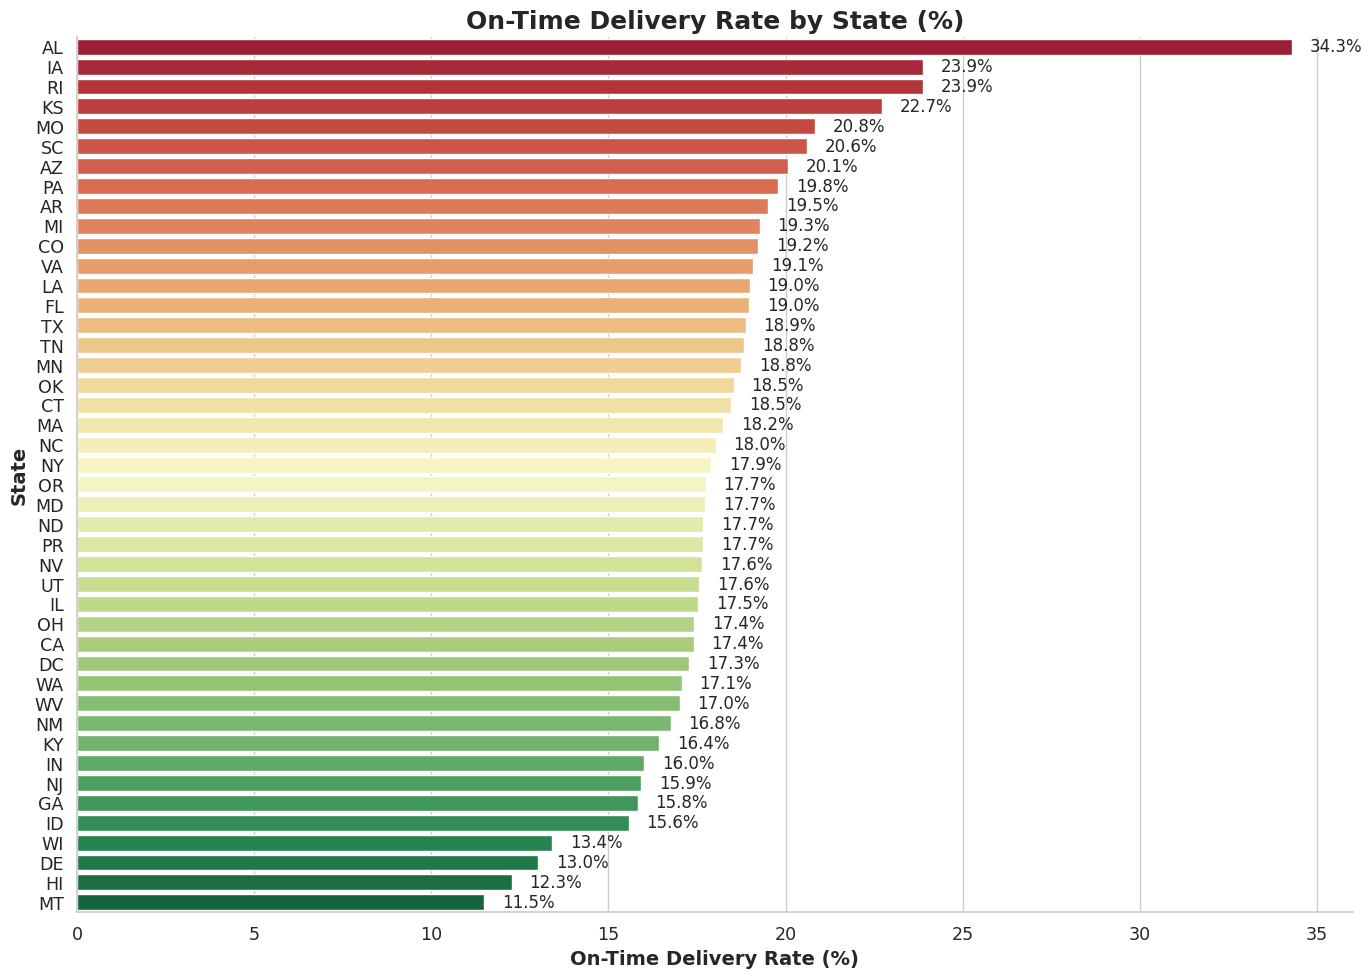

In [14]:
# Group by state to calculate on-time delivery rate per state
state_delivery = df.groupby('Customer State')['OnTime'].mean().sort_values(ascending=False) * 100

plt.figure(figsize=(14,10))
ax = sns.barplot(x=state_delivery.values, y=state_delivery.index, palette='RdYlGn')
ax.set_title('On-Time Delivery Rate by State (%)', fontsize=18, weight='bold')
ax.set_xlabel('On-Time Delivery Rate (%)', fontsize=14, weight='bold')
ax.set_ylabel('State', fontsize=14, weight='bold')
sns.despine()
for i, v in enumerate(state_delivery.values):
    ax.text(v + 0.5, i, f'{v:.1f}%', va='center', fontsize=12)
plt.tight_layout()
plt.show()

<hr/>
<div class="alert alert-success alertsuccess" style="margin-top: 20px">
  <strong>Delivery Performance by Geography – Interpretation</strong>
  <ul>
    <li><strong>Extreme Variation Across States:</strong> The on-time delivery rate exhibits very wide variation by state. Alabama (AL) leads with a rate of 34.3%, remarkably higher than all other regions and nearly double the overall average (~17.8%). After AL, most states cluster much lower, with the majority hovering around 16–24%.</li>
    <li><strong>Most States Underperform:</strong> The vast majority of states, including significant markets like CA, NY, TX, FL, and others, have on-time rates below 20%, aligning with the low overall average. Several states and territories—such as Montana (MT), Hawaii (HI), Delaware (DE), and Wisconsin (WI)—have the lowest rates, some even below 13%.</li>
    <li>
      <strong>Best and Worst Performers:</strong>
      <ul>
        <li><strong>Top Performers:</strong> Alabama (AL) – 34.3%, Iowa (IA) and Rhode Island (RI) – 23.9%, Kansas (KS) – 22.7%. These states may offer operational best practices worth replicating.</li>
        <li><strong>Worst Performers:</strong> Montana (MT) – 11.5%, Hawaii (HI) – 12.3%, Delaware (DE) – 13.0%, Wisconsin (WI) – 13.4%. These regions require urgent attention and process review.</li>
        <li><strong>Puerto Rico (PR):</strong> Sits near the middle with 17.7%, matching the overall national average but still low in absolute terms.</li>
      </ul>
    </li>
  </ul>
</div>
<hr/>
<hr style="border: 1px solid red;">

## **6. Delivery Performance by Customer Segment or Product**
<hr style="border: 1px solid red;">

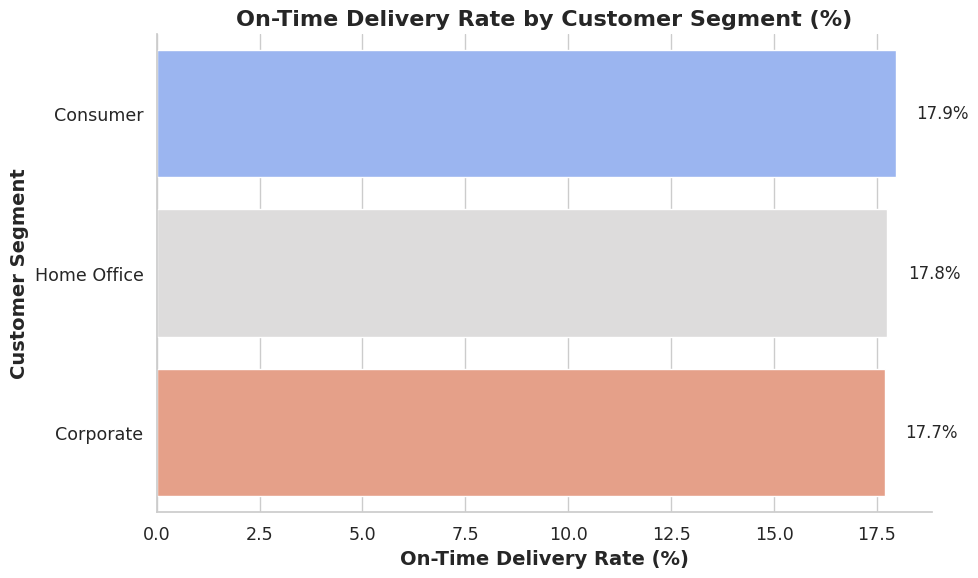

In [15]:
if 'Customer Segment' in df.columns:
    segment_delivery = df.groupby('Customer Segment')['OnTime'].mean().sort_values(ascending=False) * 100
    plt.figure(figsize=(10,6))
    ax = sns.barplot(x=segment_delivery.values, y=segment_delivery.index, palette='coolwarm')
    ax.set_title("On-Time Delivery Rate by Customer Segment (%)", fontsize=16, weight='bold')
    ax.set_xlabel("On-Time Delivery Rate (%)", fontsize=14, weight='bold')
    ax.set_ylabel("Customer Segment", fontsize=14, weight='bold')
    sns.despine()
    for i, v in enumerate(segment_delivery.values):
        ax.text(v + 0.5, i, f'{v:.1f}%', va='center', fontsize=12)
    plt.tight_layout()
    plt.show()


<hr/>
<div class="alert alert-success alertsuccess" style="margin-top: 20px">
  <strong>Delivery Performance by Customer Segment – Interpretation</strong>
  <ul>
    <li><strong>Narrow Differences Across Segments:</strong> The on-time delivery rates for each customer segment (Consumer, Home Office, Corporate) are all very close, ranging from 17.7% (Corporate) to 17.9% (Consumer). This suggests that the reliability of delivery is consistently low regardless of customer type.</li>
    <li>
      <strong>Key Insights:</strong>
      <ul>
        <li>Consumers have a marginally higher on-time delivery rate (17.9%) than the Home Office (17.8%) and Corporate (17.7%) segments, but these differences are minimal and not operationally significant.</li>
        <li>All segments are affected equally by delivery delays; there is no segment that escapes the overall systemic delivery challenge.</li>
      </ul>
    </li>
  </ul>
</div>
<hr/>
<hr style="border: 1px solid red;">

## **7. Analyze Delivery Delay Patterns**
<hr style="border: 1px solid red;">

Average Delivery Lag for Late Orders: 3.58 days


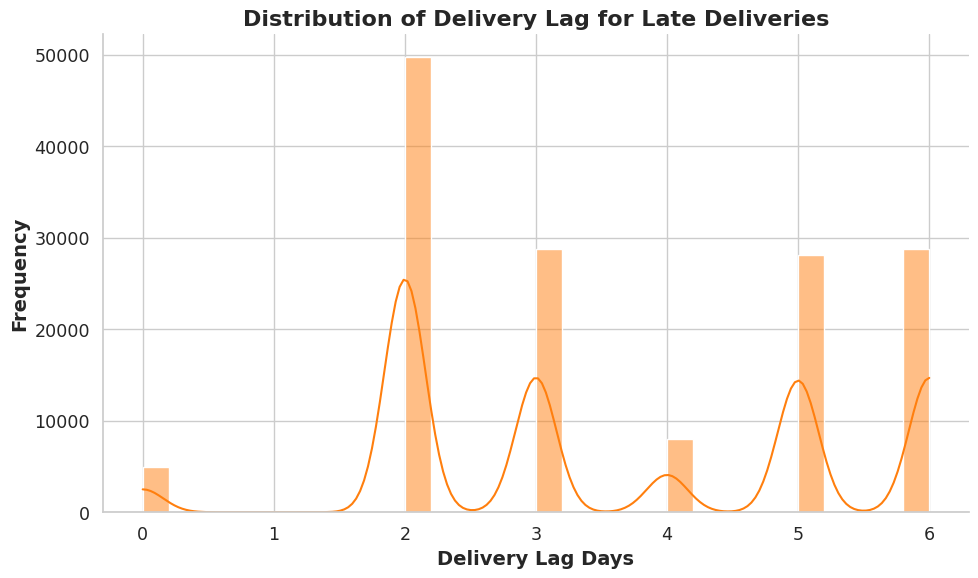

In [20]:
# Convert order dates and shipping dates to datetime
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'], errors='coerce')
df['shipping date (DateOrders)'] = pd.to_datetime(df['shipping date (DateOrders)'], errors='coerce')
# Calculate delivery lag days (time between order and delivery)
df['Delivery Lag Days'] = (df['shipping date (DateOrders)'] - df['order date (DateOrders)']).dt.days

# Average and distribution for late deliveries
late_deliveries = df[df['OnTime'] == False]
average_lag = late_deliveries['Delivery Lag Days'].mean()
print(f"Average Delivery Lag for Late Orders: {average_lag:.2f} days")

plt.figure(figsize=(10,6))
sns.histplot(late_deliveries['Delivery Lag Days'], bins=30, kde=True, color='#ff7f0e')
plt.title('Distribution of Delivery Lag for Late Deliveries', fontsize=16, weight='bold')
plt.xlabel('Delivery Lag Days', fontsize=14, weight='bold')
plt.ylabel('Frequency', fontsize=14, weight='bold')
sns.despine()
plt.tight_layout()
plt.show()


<hr/>
<div class="alert alert-success alertsuccess" style="margin-top: 20px">
  <strong>Delivery Delay Patterns – Interpretation</strong>
  <ul>
    <li><strong>Visual Overview:</strong> The histogram titled "Distribution of Delivery Lag for Late Deliveries" shows how many days late deliveries were, with frequency represented by bar height, and the distribution appears to have multiple peaks.</li>
    <li>
      <strong>Key Observations:</strong>
      <ul>
        <li><strong>Most Common Delay Durations:</strong> The largest spike occurs at 2 days lag, with smaller but notable peaks at 3, 5, and 6 days, suggesting recurring operational delays at those intervals.</li>
        <li><strong>Typical Delay Range:</strong> Delays span from 1 to 6 days, with nearly all late deliveries within this window, while very short (under 1 day) and very long (over 6 days) delays are rare.</li>
        <li><strong>Frequency Distribution:</strong> The 2-day delay stands out as the most frequent, indicating a recurring bottleneck or scheduling issue, followed by clusters at 3, 5, and 6 days.</li>
      </ul>
    </li>
  </ul>
</div>
<hr/>
<hr style="border: 1px solid red;">

## **8. Monthly Trend of On-Time Delivery Rate**
<hr style="border: 1px solid red;">

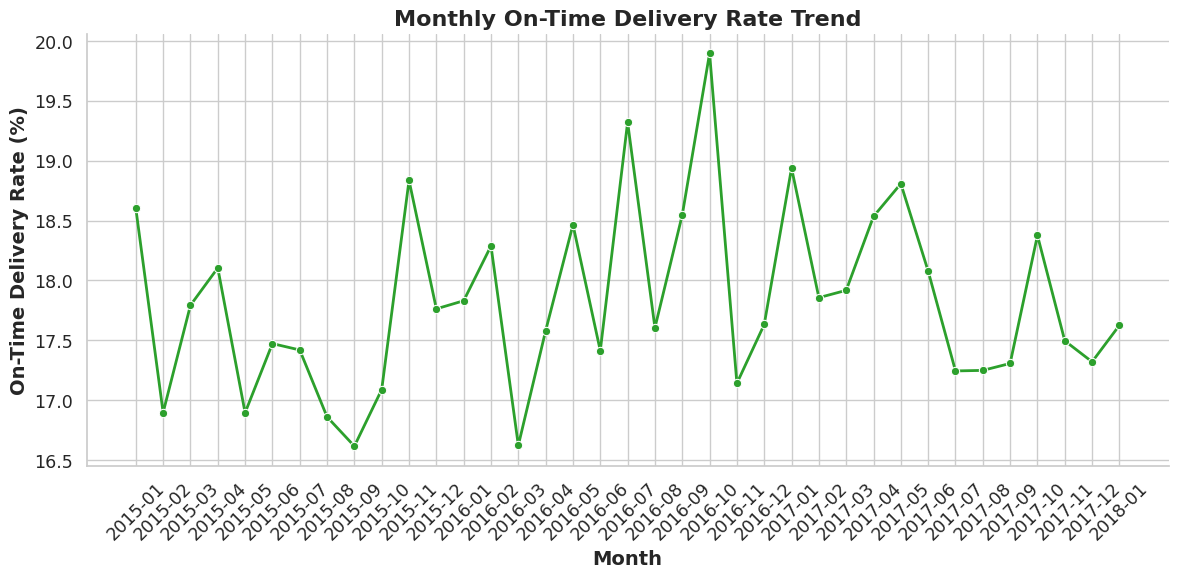

In [21]:
# Monthly on-time delivery trend
df['Order Month'] = df['order date (DateOrders)'].dt.to_period('M')
monthly_ontime = df.groupby('Order Month')['OnTime'].mean() * 100

plt.figure(figsize=(12,6))
sns.lineplot(x=monthly_ontime.index.astype(str), y=monthly_ontime.values, marker='o', color="#2ca02c", lw=2)
plt.title('Monthly On-Time Delivery Rate Trend', fontsize=16, weight='bold')
plt.xlabel('Month', fontsize=14, weight='bold')
plt.ylabel('On-Time Delivery Rate (%)', fontsize=14, weight='bold')
plt.xticks(rotation=45)
sns.despine()
plt.tight_layout()
plt.show()

<hr/>
<div class="alert alert-success alertsuccess" style="margin-top: 20px">
  <strong>Monthly Trend of On-Time Delivery Rate</strong>
  <ul>
    <li><strong>What the chart shows:</strong> The attached line graph displays the monthly trend for the On-Time Delivery Rate (%) from January 2015 to January 2018. Each point reflects the percentage of orders delivered on time for that month, making it easy to spot overall trends, peaks, and dips in performance.</li>
    <li><strong>Key observations:</strong>
      <ul>
        <li>The on-time delivery rate consistently remains low, mostly between 17% and 19%, with only a few brief peaks (notably close to 20% in late 2016).</li>
        <li>The rate fluctuates substantially from month to month, showing no strong upward or downward improvement trend over this multi-year period.</li>
        <li>There are occasional sharp spikes and drops, which may correspond to seasonal pressures or operational disruptions, but no sustained progress is evident over time.</li>
        <li>The most significant improvement occurred between June 2016 and October 2016, but was not maintained in later months.</li>
      </ul>
    </li>
    <li><strong>Interpretation:</strong> The supply chain has struggled to reliably increase its on-time delivery performance on a consistent basis. Despite minor improvements during some months, systemic issues persist—on-time delivery never rises above 20% and frequently falls back. This indicates enduring operational challenges that have not been fully addressed.</li>
  </ul>
</div>
<hr/>
<hr style="border: 1px solid red;">